# Lab 1

### 1.1 Leer la seccion 9.4 sobre el operador Hit or Miss. Explicar con sus propias palabras como funciona este operador, y como se construye la operacion A ∗ B a partir de las operaciones basicas de dilatacion, erosion, opening, closing y diferencia. 



El operador Hit or Miss es una tecnica para detectar patrones especificos en una imágen en blanco y negro (binaria). Este patrón usado tambien es llamado "elemento estructurante" y se usa en la comparación con la imágen original para saber si regiones de dicha imágen coinciden exactamente con el patron y que otras no coinciden. 

1. Dilatación: La dilatación sirve para ampliar las regiones de la imágen que coinciden parcialmente con el patrón o elemento estructurante, dado un origen en este.

2. Erosión: La erosión sirve para disminuir la imágen original. Busca encontrar aquellas zonas que no coinciden con el elemento estructurante.

3. Opening: Opening se utiliza para eliminar objetos pequeños y crear divisiones más grandes entre distintos objetos. El opening proviene al realizar la erosión en la imagen con un elemento estructurante y luego realizar la dilatación al resultado, con el mismo elemento estructurante.

4. Closing: El closing se utiliza para el resultado contrario del opening, para rellenar huecos y unir objetos (como un puente). Se obtiene al realizar una dilatación de la imágen con un elemento estructurante y luego realizar la erosión al resultado, con el mismo elemento estructurante.

5. Diferencia: Representa lo que está en una imagen y que no está en la otra. Sirve para identificar las regiones que no cumplen con el patron o con el elemento restructurante y de esa forma poder entender todas aquellas que si lo cumplen. 

Matemáticamente hablando: El operador hit or miss se puede representar como la intersección entre la erosión de la imagen con los recuadros blancos del patron y la erosión del complemento de la imagen con los recuadros negros del patron.
Además, tambien se puede representar como la diferencia entre la erosión de la imágen original con los recuadros blancos del patrón y la dilatación de la imágen original con los recuadros negros de la función.
Dicho esto, se puede representar también en terminos de las operaciones opening closing y diferencia. Se expresaría siendo una intersección entre el Opening de la imágen original con el patron, el closing de la imágen original con el patron y la diferencia entre la imágen original y el patron.



### 1.2 Mostrar un ejemplo con una imagen binaria de su elección en donde se muestre que el operador Hit or Miss detecta la localizacion de un (o varios) objetos especificos dentro de una imagen binaria I

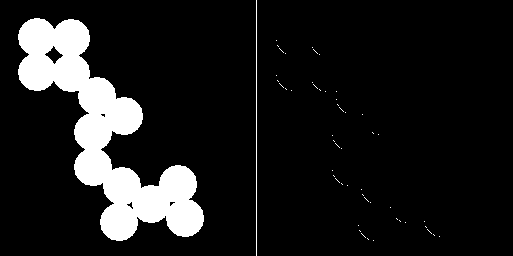

Obtenida de: https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html

### 2. Invertir y binarizar la imagen fingerprint.jpeg a continuacion. Luego, aplicar transformaciones morfologicas adecuadas para remover y restaurar la imagen.

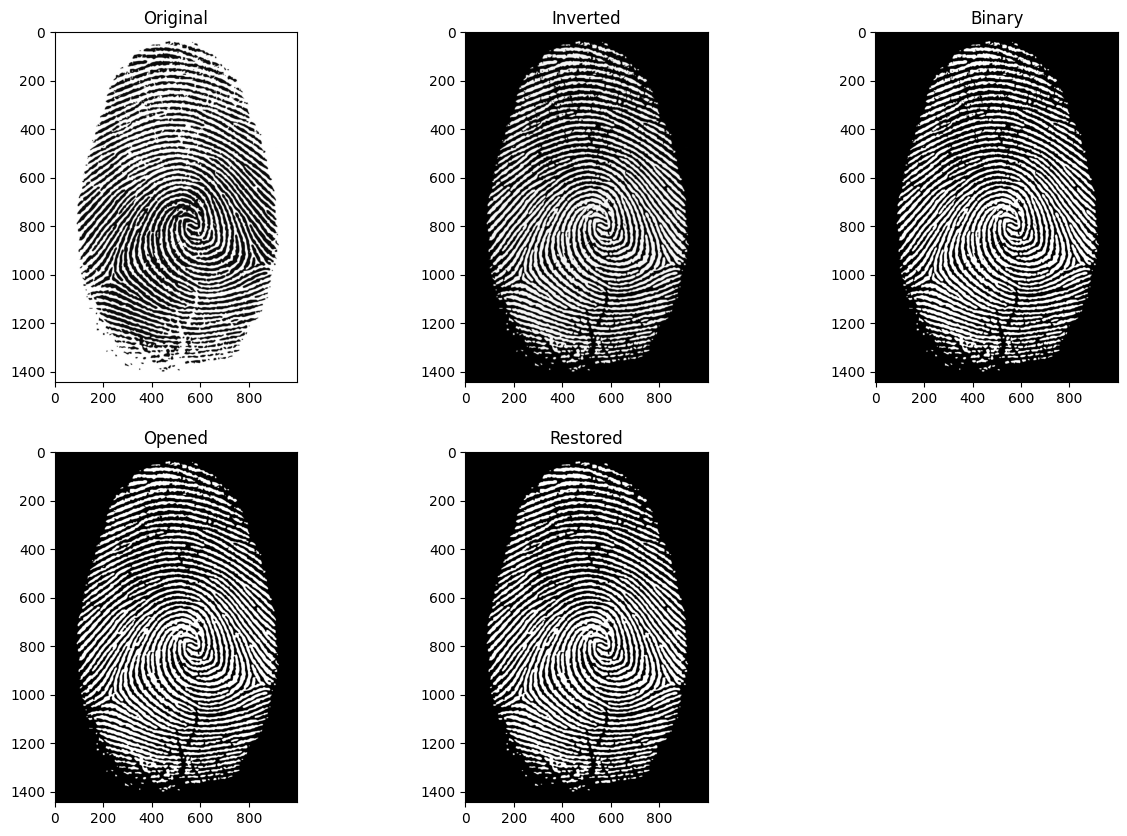

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Leer la imagen
image = cv2.imread('assets/fingerprint.jpeg', cv2.IMREAD_GRAYSCALE)

# Invertir la imagen
inverted_image = cv2.bitwise_not(image)

# Binarizar la imagen usando un umbral
_, binary_image = cv2.threshold(inverted_image, 100, 255, cv2.THRESH_BINARY)

# Aplicar transformaciones morfológicas
kernel = np.ones((3,5), np.uint8)

# Remover ruido utilizando una operación de apertura
opening = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Restaurar la imagen utilizando una operación de cierre
restored_image = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Inverted')
plt.imshow(inverted_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Binary')
plt.imshow(binary_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Opened')
plt.imshow(opening, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Restored')
plt.imshow(restored_image, cmap='gray')

plt.show()
